# NumPy 基础

由于 NumPy 提供了一个简单易用的C API，因此很容易将数据传递由低级语言编写的外部库，外部库也能以 NumPy 数组的形式将数据返回给 Python 。这个功能使 Python 成为一种包装 C/C++/Fortran 历史代码库的选择，并使被包装库拥有动态的、易用的接口。

 **NumPy 本身没有提供高级的数据分析工具，但理解 NumPy 数组以及面向数组的计算有助于更高效地使用诸如 Pandas 等工具。**

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：

- NumPy 是在一个连续的内存块中存储数据，独立于其他 Python 内置对象。
- NumPy 的 C 语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起 Python 的内置序列，NumPy 数组使用的内存更少。
- NumPy 可以在整个数组上执行复杂的计算，而不需要 Python 的 for 循环。


## 性能与特点

In [183]:
# numpy 与 list 性能比较
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(10000000))

In [184]:
# numpy
%time for _ in range(10): my_arr = my_arr * 2

Wall time: 40 ms


In [185]:
# list
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

Wall time: 12.8 s


**结论：基于 Numpy 的算法要比纯 Python 快 10 到 100 倍，并且使用的内存更少。**

 NumPy 的特点：
-  N 维数组对象（即ndarray）是一个快速而灵活的大数据集容器。可以利用这种数组对象对**整块**数据执行一些数学运算，其语法和标量元素之间的运算一样。
- ndarry 是一个具有通用的同构数据多维容器，所以其中的元素必须是相同类型的。每个数组都有一个 `shape`（一个表示各维度大小的元组） 和 一个 `dtype`（一个用于说明数组数据类型的对象）。

In [16]:
import numpy as np

data = np.random.randn(2, 3)  # 生成随机数组
# 运算
print("data*10:", data * 10)
print("data+data:", data + data)

[[-0.63874239  0.74240268 -2.35248066]
 [-1.32557222 -0.73172878 -0.04198132]]
data*10: [[ -6.38742389   7.42402679 -23.52480658]
 [-13.25572225  -7.3172878   -0.41981322]]
data+data: [[-1.27748478  1.48480536 -4.70496132]
 [-2.65114445 -1.46345756 -0.08396264]]


## 创建 ndarry

- 除非特别说明，np.array 会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的 dtype 对象中。
- 由于 NumPy 关注的是数值计算，因此，如果没有特别指定，数据类型基本都是 float64（浮点数）。

![](Img/7178691-78ab11f67e7077a6.png)

In [22]:
# 方法1: array() 函数
# 将输入的数据（列表、元组、数组或者其他序列类型）转为 ndarray
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

# 嵌套序列将被转化为多维数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [24]:
arr2.ndim  # 2
arr2.shape  # (2,4)

(2, 4)

In [27]:
arr1.dtype  # float64
arr2.dtype  # int32

dtype('int32')

In [31]:
# 方法2：zero(),ones() 和 empty()
arr_zeros = np.zeros(10)
print(arr_zeros)

arr_ones = np.ones((3, 6))
print(arr_ones)

np.empty((2, 3, 2))

# 注意：认为np.empty会返回全0数组的想法是不安全的。
# 很多情况下（如前所示），它返回的都是一些未初始化的垃圾值。

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


array([[[8.74476807e-312, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.89146896e-307, 5.64233733e-067]],

       [[4.26897496e-090, 1.24555553e-047],
        [3.61343578e+174, 7.24751189e+169],
        [3.99910963e+252, 3.73541898e-033]]])

In [32]:
# 方法3:arrange()
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## ndarry 的数据类型

dtype 是一个特殊的对象，它含有 ndarray 将一块内存解释为特定数据类型所需的信息。

![](Img/7178691-2f2d7406a8bc076c.png)
![](Img/7178691-5cc31115615737b7.png)

>笔记：记不住这些NumPy的dtype也没关系，通常只需要知道你所处理的数据的大致类型是浮点数、复数、整数、布尔值、字符串，还是普通的Python对象即可。当你需要控制数据在内存和磁盘中的存储方式时（尤其是对大数据集），那就得了解如何控制存储类型。

In [45]:
# 指定数据类型
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int64)

# 转换数据类型：int -> float
arr = np.array([1, 2, 3, 4, 5])
arr.dtype  # int32
float_arr = arr.astype(np.float64)
float_arr.dtype  # float64

# float -> int，小数部分会被截取删除
arr = np.random.randn(10)
print(arr)
arr.astype(np.int32)

# string -> float
numeric_strings = np.array(['1.24', '3.69', '7.98'], dtype=np.string_)
numeric_strings.astype(float)  # 为啥没写float64? NumPy 会自动映射到等价的 dtype 上。

# 注意：使用numpy.string_类型时，一定要小心，
# 因为 NumPy 的字符串数据是大小固定的，发生截取时，不会发出警告。
# pandas提供了更多非数值数据的便利的处理方法。

[-0.16936503 -1.36482864 -0.14741344  0.0553577  -0.42449805  0.20203713
  0.05995079  1.00015389 -0.16375241  0.42793938]


array([1.24, 3.69, 7.98])

In [46]:
# astype: as (specific array's) type
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

# 笔记：调用astype总会创建一个新的数组（一个数据的备份），
# 即使新的dtype与旧的dtype相同。

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [48]:
# 简写类型代码
empty_unit32 = np.empty(8, dtype='u4')  # uint 32
empty_unit32.dtype

dtype('uint32')

## NumPy 数组运算

- 数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级。
- 数量与标量的算术运算会将标量值传播到各个元素，不同大小的数组之间的运算叫做广播（broadcasting）。
- 大小相同的数组之间的比较会生成布尔值数组。

In [51]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

# 相乘
arr*arr

# 相减
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [53]:
# 数量与标量的算术运算会将标量值传播到各个元素

1/arr
arr**0.5

# 大小相同的数组之间的比较会生成布尔值数组
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## 基本索引和切片

- 当你将一个标量值赋值给一个切片时（如`arr[5:8]=12`），该值会自动传播（也就说后面将会讲到的“广播”）到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。**这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。**

- 如果你刚开始接触NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热衷于复制数组数据的编程语言）。由于NumPy的设计目的是处理大数据，所以你可以想象一下，假如NumPy坚持要将数据复制来复制去的话会产生何等的性能和内存问题。

> 注意：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如``arr[5:8].copy()``。

- 二维数组索引方式（**轴0为行，轴1为列**）：
![](Img/7178691-0a641536f73f560e.png)

In [55]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [57]:
# 视图上任何数据修改都会直接反映到源数据上
arr_slice = arr[5:8]
arr_slice[:] = 64  # [:] 会给所有值复赋值
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [59]:
# 高维度数组
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]  # 索引对应的不是标量，而是一维数组

array([7, 8, 9])

In [60]:
# 对元素递归访问
arr2d[0][2]
arr2d[0, 2]

3

In [63]:
# 在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。
# 因此，在2×2×3数组arr3d中：
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape  # 2*2*3

(2, 2, 3)

In [70]:
arr3d[0]
arr3d[1, 0]
arr3d[0].shape  # 2*3

old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

## 切片索引

切片索引与 Python 一维对象类似

高维轴进行切片：
![](Img/7178691-9da32d2f4629c304.png)

In [72]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [73]:
# 二维数组切片，沿着第 0 轴切片
arr2d
arr2d[:2]  # 选取arr2d的前两行

array([[1, 2, 3],
       [4, 5, 6]])

In [79]:
arr2d[1, :2]  # 第2个行的前两列
arr2d[:2, 2]
arr2d[:, :1]  # [:] 表示选取整个轴
arr2d[:2, 1:] = 0  # 对切片表达式的赋值操作也会被扩散到整个选区

In [ ]:
# 布尔型索引

In [85]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[ 0.55917371, -1.43290377, -0.2351027 , -1.54375571],
       [ 0.3865012 ,  0.70542362,  0.64344927, -0.02576441],
       [ 0.79947499, -1.52818786, -1.55004992, -0.06342341],
       [-1.03700837,  1.12779858, -0.50400492, -0.86208905],
       [ 1.3489014 ,  0.38120337,  1.80438522, -0.30439788],
       [ 0.0749773 , -0.13251711, -0.20391346,  0.10045567],
       [-0.40455669, -0.55339037, -0.30575149,  0.4472211 ]])

In [86]:
names == 'Bob'  # 产生布尔类型数组

array([ True, False, False,  True, False, False, False])

In [87]:
data[names == 'Bob']  # 布尔型数组可用于数组索引

array([[ 0.55917371, -1.43290377, -0.2351027 , -1.54375571],
       [-1.03700837,  1.12779858, -0.50400492, -0.86208905]])

In [88]:
# 将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用
data[names == 'Bob']

array([[ 0.55917371, -1.43290377, -0.2351027 , -1.54375571],
       [-1.03700837,  1.12779858, -0.50400492, -0.86208905]])

但是要注意，布尔型数组的长度必须跟被索引的轴长度一致。如果布尔型数组的长度不对，布尔型选择就会出错，因此一定要小心。

In [89]:
data[names == 'Bob', 2:]

array([[-0.2351027 , -1.54375571],
       [-0.50400492, -0.86208905]])

In [90]:
data[names == 'Bob', 3]

array([-1.54375571, -0.86208905])

In [93]:
data[names != 'Bob']
# or
data[~(names == 'Bob')]

array([[ 0.3865012 ,  0.70542362,  0.64344927, -0.02576441],
       [ 0.79947499, -1.52818786, -1.55004992, -0.06342341],
       [ 1.3489014 ,  0.38120337,  1.80438522, -0.30439788],
       [ 0.0749773 , -0.13251711, -0.20391346,  0.10045567],
       [-0.40455669, -0.55339037, -0.30575149,  0.4472211 ]])

In [96]:
# 选取这三个名字中的两个需要组合应用多个布尔条件，
# 使用&（和）、|（或）之类的布尔算术运算符即可：

mask = (names == 'Bob') | (names == 'will')
mask

array([ True, False, False,  True, False, False, False])

In [97]:
data[mask]

array([[ 0.55917371, -1.43290377, -0.2351027 , -1.54375571],
       [-1.03700837,  1.12779858, -0.50400492, -0.86208905]])

通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。

>注意：Python关键字and和or在布尔型数组中无效。要使用&与|。

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需：

In [100]:
data[data < 0] = 0
data

array([[0.55917371, 0.        , 0.        , 0.        ],
       [0.3865012 , 0.70542362, 0.64344927, 0.        ],
       [0.79947499, 0.        , 0.        , 0.        ],
       [0.        , 1.12779858, 0.        , 0.        ],
       [1.3489014 , 0.38120337, 1.80438522, 0.        ],
       [0.0749773 , 0.        , 0.        , 0.10045567],
       [0.        , 0.        , 0.        , 0.4472211 ]])

In [102]:
data[names != 'Bob'] = 7
data

# 这类二维数据的操作也可以用于 pandas

array([[0.55917371, 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.12779858, 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ]])

## 花式索引
花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。

In [106]:
arr = np.empty((8, 4))  # 8*4
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [107]:
# 为了以特定顺序选取行子集，
# 只需传入一个用于指定顺序的整数列表或ndarray即可：
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [108]:
arr[[-3, -5, -7]]  # 传入负数将从末尾开始选取

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [112]:
# 一次传入多个索引数组
arr = np.arange(32).reshape((8, 4))
print(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
# array([ 4, 23, 29, 10])

# 取出的实际是元组
list(zip([1, 5, 7, 2], [0, 3, 1, 2]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


[(1, 0), (5, 3), (7, 1), (2, 2)]

In [113]:
# 数组转置和轴对换
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [114]:
arr.T  # 转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [116]:
arr = np.random.randn(6, 3)  # 计算矩阵内积
arr

array([[-1.61797821,  0.71427583,  0.81240901],
       [ 0.22170311,  0.37773658, -1.24671535],
       [-1.26891901,  1.25605144, -1.48000077],
       [ 0.81836807, -0.26868663, -0.25480561],
       [ 0.57094846,  0.1876973 , -1.60189099],
       [ 1.55708786, -0.67142811, -0.91553916]])

In [119]:
# 高维数组transpose需要得到一个由轴编号组成的元组
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
arr.transpose((1, 0, 2))
# 第 1 个轴转为第 2 个
# 第 2 个轴转为第 1 个

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [120]:
arr.swapaxes(1, 2)  # 接受一对轴编号

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对 ndarray 中的数据执行元素级运算的函数。**可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。**
![](Img/7178691-1d494e73b61c7ced.png)
![](Img/7178691-4e38d02a66481530.png)
![](Img/7178691-eff1e61e5464159f.png)
![](Img/7178691-236dba83b6a420cc.png)

In [122]:
# 一元通用函数（unary ufunc）
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [123]:
# 二元通用函数（binary ufunc）
x = np.random.randn(8)
y = np.random.randn(8)

np.maximum(x, y)  # 计算x和元素级别中的最大元素

array([0.47109386, 1.68459132, 0.64188939, 0.46463172, 0.9528307 ,
       0.58236413, 0.27777411, 0.2178618 ])

In [124]:
# 返回多个数组
arr = np.random.randn(7) * 5
remainder, whole_part = np.modf(arr)
remainder
whole_part

array([-6.,  9., -1., -1.,  5., -3.,  1.])

## 利用数组进行数据处理
用数组表达式代替循环的做法，通常被称为**矢量化**。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。在后面内容中（见附录A）我将介绍广播，这是一种针对矢量化计算的强大手段。

In [126]:
# 例子:在一组值（网格型）上计算函数 sqrt(x^2+y^2)

points = np.arange(-15, 5, 0.01)  # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys
# np.meshgrid函数接受两个一维数组，
# 并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）

array([[-15.  , -15.  , -15.  , ..., -15.  , -15.  , -15.  ],
       [-14.99, -14.99, -14.99, ..., -14.99, -14.99, -14.99],
       [-14.98, -14.98, -14.98, ..., -14.98, -14.98, -14.98],
       ...,
       [  4.97,   4.97,   4.97, ...,   4.97,   4.97,   4.97],
       [  4.98,   4.98,   4.98, ...,   4.98,   4.98,   4.98],
       [  4.99,   4.99,   4.99, ...,   4.99,   4.99,   4.99]])

In [128]:
z = np.sqrt(xs**2+ys**2)
z

array([[21.21320344, 21.20613355, 21.19906602, ..., 15.8019271 ,
        15.80507513, 15.80822887],
       [21.20613355, 21.1990613 , 21.19199141, ..., 15.7924349 ,
        15.79558483, 15.79874046],
       [21.19906602, 21.19199141, 21.18491916, ..., 15.78294332,
        15.78609515, 15.78925267],
       ...,
       [15.8019271 , 15.7924349 , 15.78294332, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [15.80507513, 15.79558483, 15.78609515, ...,  7.03571603,
         7.04278354,  7.04985815],
       [15.80822887, 15.79874046, 15.78925267, ...,  7.04279774,
         7.04985815,  7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

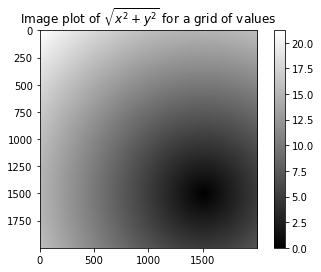

In [133]:
# 二维数组的可视化
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 将条件逻辑表述为数组运算

`numpy.where`函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [134]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [136]:
# 假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，
# 选取xarr的值，否则从yarr中选取。

result = [(x if c else y)for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [137]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

**np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。**假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [139]:
arr = np.random.randn(4, 4)
arr > 0

array([[ True, False, False, False],
       [False, False, False, False],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [140]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [-2, -2, -2, -2],
       [-2,  2, -2,  2],
       [-2,  2, -2,  2]])

使用np.where，可以将标量和数组结合起来。传递给where的数组大小可以不相等，甚至可以是标量值。例如，我可用常数2替换arr中所有正的值：

In [141]:
np.where(arr > 0, 2, arr)  # set only positive values to 2

array([[ 2.        , -1.67090451, -0.86196714, -0.00646435],
       [-0.42614028, -1.61551423, -1.6917418 , -1.8297736 ],
       [-0.62692482,  2.        , -0.04524701,  2.        ],
       [-0.58904428,  2.        , -0.58246664,  2.        ]])

## 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

基本数组统计方法：
![](Img/7178691-a6c6df3ca8e0b98e.png)
![](Img/7178691-866fcde885b1d357.png)

In [142]:
# 生成正态分布随机数据，然后做聚类分析
arr = np.random.randn(5, 4)
arr

array([[-1.0060044 , -0.70819174, -0.47566581,  1.03814765],
       [ 0.36793898,  0.80043492,  0.14351722,  0.85971664],
       [ 0.33214098, -0.01085989,  0.7350142 , -1.16954906],
       [-2.11357988,  1.24135258,  0.55217518, -0.36647698],
       [ 0.18645153, -0.33822082, -0.67734818, -0.10614964]])

In [143]:
arr.mean()
# or
np.mean(arr)

-0.035757826216177964

In [144]:
arr.sum()

-0.7151565243235593

In [145]:
# mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，
# 最终结果是一个少一维的数组：

arr.mean(axis=1)  # 计算行的平均值
arr.sum(axis=0)  # 计算每列的和

array([-2.23305279,  0.98451504,  0.27769261,  0.25568861])

In [149]:
# 其他如cumsum和cumprod之类的方法则不聚合，
# 而是产生一个由中间结果组成的数组：

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()  # 累加函数

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [152]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 用于布尔型数组的方法
在数组统计积计算中，布尔值会被强制转化为1（True）和0（False。因此，`sum`经常被用来 对布尔型数组中的True计数:

In [153]:
arr = np.random.randn(100)
(arr > 0).sum()  # Number of positive values

46

In [154]:
# any: 用于册数数组中是否存在一个或多个True
# all:检查数组中所有值是否都为 True
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

## 排序

跟 Python 内置的列表类型类似，NumPy数组也可以用过 `sort` 方法就地排序：

In [157]:
# 一维数组
arr = np.random.randn(6)
arr.sort()
arr

array([-2.64291735, -0.90947817, -0.86968068, -0.52053525, -0.46641829,
       -0.38384936])

In [159]:
# 多维数组
# 可以在任何一个轴上排序，只需将轴编号传给 sort 即可：
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[-2.24286272, -1.29354116,  0.91499514],
       [-0.38556946,  0.28916917,  1.14490084],
       [-0.32908456, -0.31612558,  0.41694277],
       [-0.74547716, -0.52013128, -0.18329579],
       [-3.07889563, -0.40542903, -0.03180835]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [161]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr

array([-2.73085895e+00, -2.60740665e+00, -2.56476761e+00, -2.55593510e+00,
       -2.52464673e+00, -2.50577433e+00, -2.50408858e+00, -2.48350422e+00,
       -2.44704751e+00, -2.42506009e+00, -2.41641488e+00, -2.35659390e+00,
       -2.33243745e+00, -2.31662911e+00, -2.27550708e+00, -2.26422255e+00,
       -2.26117481e+00, -2.25669131e+00, -2.23043509e+00, -2.19141907e+00,
       -2.17456220e+00, -2.15384261e+00, -2.08753109e+00, -2.07409048e+00,
       -2.05525622e+00, -2.03941477e+00, -2.03858813e+00, -2.02830199e+00,
       -2.00082789e+00, -1.99980374e+00, -1.98468726e+00, -1.97476567e+00,
       -1.95798920e+00, -1.93522185e+00, -1.92321546e+00, -1.91953779e+00,
       -1.90970692e+00, -1.89691962e+00, -1.85485368e+00, -1.85044867e+00,
       -1.84747476e+00, -1.83410098e+00, -1.81014417e+00, -1.78478739e+00,
       -1.76496904e+00, -1.74829513e+00, -1.71837414e+00, -1.70848023e+00,
       -1.70428072e+00, -1.69821339e+00, -1.69314772e+00, -1.68720539e+00,
       -1.67499302e+00, -

In [162]:
large_arr[int(0.05 * len(large_arr))]  # 5% quantile

-1.6931477181575139

## 唯一化以及其它集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。NumPy的集合函数：

![](Img/7178691-80e85ae6b9c89ada.png)


最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：

In [163]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [165]:
ints = np.array([3, 3, 3, 3, 2, 2, 1, 1, 4, 4, ])
np.unique(ints)

array([1, 2, 3, 4])

In [166]:
# 纯 Python 代码
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [167]:
values = np.array([6, 0, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False, False,  True,  True, False,  True])

## 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或者二进制文件。本小节只讨论NumPy的内置二进制格式，因为我们会更多的使用Pandas或其他的工具加载文本或者表格数据。
    
np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的：

In [171]:
arr = np.arange(10)
np.save('Examples\some_array', arr)
# 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。

In [172]:
# 读取磁盘上的数组
np.load('Examples\some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [175]:
# 通过np.savez可以将多个数组保存到一个未压缩文件中，
# 将数组以关键字参数的形式传入即可：
np.savez('array_archive.npz', a=arr, b=arr)

In [177]:
# 加载.npz文件时，你会得到一个类似字典的对象，
# 该对象会对各个数组进行延迟加载：
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [178]:
# 如果要将数据压缩，可以使用numpy.savez_compressed:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 线性代数

最常用的线性代数函数：
![](Img/7178691-dcdb66e49e5f70ea.png)


## 伪随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

![](Img/7178691-97ba09c96dab93a2.png)

例如，你可以用normal来得到一个标准正态分布的4×4样本数组：

In [179]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.33312255,  0.09280509,  0.59234755,  0.14379462],
       [-0.13994311, -0.43594354,  0.99509265,  0.6752012 ],
       [ 0.85832371, -0.2550142 ,  1.28766481, -0.50119395],
       [-0.74329554, -0.36015071, -0.60390453, -2.46375325]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级：

In [181]:
from random import normalvariate
N = 1000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.12 ms ± 50.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [182]:
%timeit np.random.normal(size=N)

42.7 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
